## Data Quality Analysis

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\Application of Software')

In [3]:
os.getcwd()

'C:\\Application of Software'

## Reading the file

In [5]:
Ch = pd.ExcelFile('churn_data.xlsx')
Ch

In [6]:
Ch = pd.read_excel('churn_data.xlsx', 'ASSOCIATION_PTB')

In [7]:
Ch.head()

,Customer_ID,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Churn,Handset,Peak_calls_Sum,...,National_mins,AveNational,All_calls_mins,Usage_Band,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
0,K100010,M,46,1999-07-18,15.066667,1,CAT 50,Churned,SOP10,14,...,58.637756,1.221620,60.081645,Low,-241.362244,11.161790,0.0,0.433167,83.833167,1.395321
1,K100020,M,27,1997-09-18,37.333333,0,CAT 50,Churned,SOP10,54,...,60.590001,0.688523,70.369367,Low,-239.409999,11.508876,0.0,2.933810,86.333810,1.226866
2,K100030,M,39,1996-08-23,50.366667,2,CAT 50,Churned,SOP20,44,...,137.400001,2.050746,154.001093,Low,-162.599999,10.283843,0.0,4.980328,88.380328,0.573894
3,K100040,M,28,1998-08-18,26.200000,2,CAT 50,Churned,SOP10,44,...,137.400000,2.050746,154.001076,Low,-162.600000,10.283843,0.0,4.980323,88.380323,0.573894
4,K100070,M,38,1999-10-14,12.133333,1,CAT 50,Churned,SOP20,68,...,64.394557,0.858594,71.067881,Low,-235.605443,13.753894,0.0,2.001997,85.401997,1.201696


## EDA

In [8]:
Ch.shape

(24999, 31)

In [9]:
list(Ch)

['Customer_ID',
 'Gender',
 'Age',
 'Connect_Date',
 'L_O_S',
 'Dropped_Calls',
 'tariff',
 'Churn',
 'Handset',
 'Peak_calls_Sum',
 'Peak_mins_Sum',
 'OffPeak_calls_Sum',
 'OffPeak_mins_Sum',
 'Weekend_calls_Sum',
 'Weekend_mins_Sum',
 'International_mins_Sum',
 'Nat_call_cost_Sum',
 'AvePeak',
 'AveOffPeak',
 'AveWeekend',
 'National_calls',
 'National_mins',
 'AveNational',
 'All_calls_mins',
 'Usage_Band',
 'Mins_charge',
 'call_cost_per_min',
 'actual_call_cost',
 'Total_call_cost',
 'Total_Cost',
 'average_cost_min']

In [10]:
Ch.isnull().any().sum()

1

## Null value found in one variable

In [11]:
Ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer_ID             24999 non-null  object        
 1   Gender                  24999 non-null  object        
 2   Age                     24999 non-null  int64         
 3   Connect_Date            24999 non-null  datetime64[ns]
 4   L_O_S                   24999 non-null  float64       
 5   Dropped_Calls           24999 non-null  int64         
 6   tariff                  24999 non-null  object        
 7   Churn                   24999 non-null  object        
 8   Handset                 24999 non-null  object        
 9   Peak_calls_Sum          24999 non-null  int64         
 10  Peak_mins_Sum           24999 non-null  float64       
 11  OffPeak_calls_Sum       24999 non-null  int64         
 12  OffPeak_mins_Sum        24999 non-null  float6

## Null value found in the variable call_cost_per_min

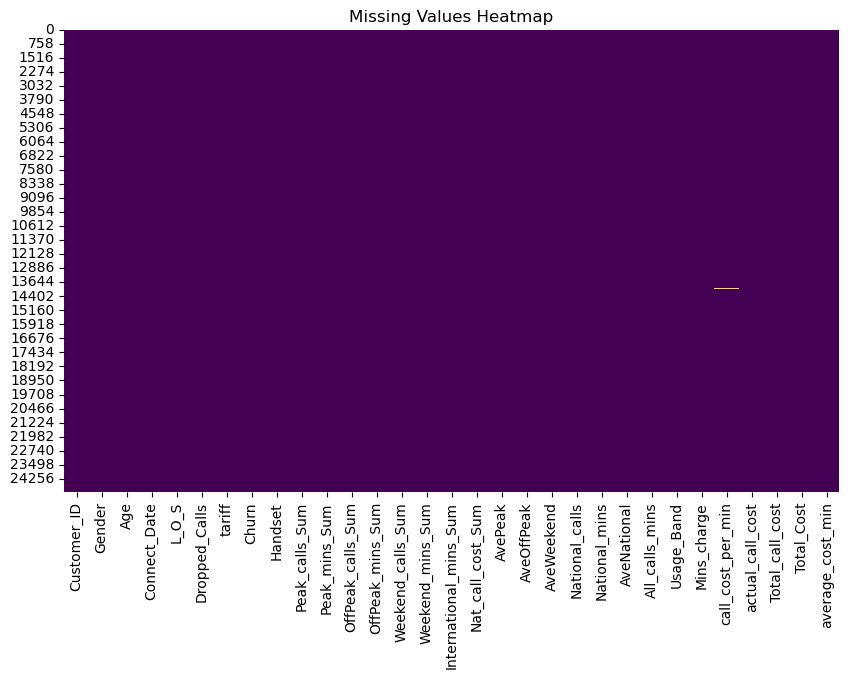

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(Ch.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Finding the observations that contain the null values

In [13]:
missing_observations = Ch[Ch.isnull().any(axis=1)]
print(missing_observations)

      Customer_ID Gender  Age Connect_Date      L_O_S  Dropped_Calls  \
73        K100940      M   42   1996-01-05  58.066667              5   
74        K100950      M   38   1998-01-04  33.733333              1   
81        K101050      M   38   1998-01-02  33.800000              2   
11155     K212470      M   12   1997-10-01  36.900000              2   
11180     K212790      M   22   1997-02-05  44.833333              2   
11181     K212820      F   22   1998-08-08  26.533333              5   
11204     K213130      M   22   1999-05-27  16.800000              2   
11218     K213350      F   16   1999-07-10  15.333333              9   
11222     K213400      M   19   1996-07-26  51.300000              2   
11227     K213450      M   20   1996-09-24  49.300000              7   
11230     K213480      M   15   1996-06-15  52.666667              2   
11237     K213580      M   17   1998-10-10  24.433333              0   
11238     K213590      M   21   1996-01-03  58.133333           

## Removing null values from the data set. As the data is large

In [14]:
ch_1 = Ch.dropna()

In [15]:
ch_1.isnull().any().sum()

0

In [16]:
print(ch_1.dtypes)

Customer_ID                       object
Gender                            object
Age                                int64
Connect_Date              datetime64[ns]
L_O_S                            float64
Dropped_Calls                      int64
tariff                            object
Churn                             object
Handset                           object
Peak_calls_Sum                     int64
Peak_mins_Sum                    float64
OffPeak_calls_Sum                  int64
OffPeak_mins_Sum                 float64
Weekend_calls_Sum                  int64
Weekend_mins_Sum                 float64
International_mins_Sum           float64
Nat_call_cost_Sum                float64
AvePeak                          float64
AveOffPeak                       float64
AveWeekend                       float64
National_calls                     int64
National_mins                    float64
AveNational                      float64
All_calls_mins                   float64
Usage_Band      

## Finding the mean,minimum,maximum and quartiles and std for all the variables

In [17]:
Ch.describe()

,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,...,National_calls,National_mins,AveNational,All_calls_mins,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
count,24999.000000,24999,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,...,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24981.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,30.348774,1998-01-16 23:09:39.335173504,33.301165,2.443538,244.262090,724.225398,96.467099,288.708725,15.693348,47.152261,...,356.422537,1060.086384,4.156837,1249.519651,97.575883,10.238101,20.923311,81.173701,194.973415,0.223113
min,12.000000,1996-01-01 00:00:00,9.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1749.600000,2.000000,0.000000,0.000000,59.940000,0.064074
25%,20.000000,1997-01-11 00:00:00,20.533333,0.000000,57.000000,327.000000,25.000000,132.600000,4.000000,20.000000,...,156.000000,642.200000,2.205000,755.725219,-118.500000,8.661073,0.000000,36.497065,131.330678,0.143628
50%,28.000000,1998-01-18 00:00:00,33.266667,1.000000,168.000000,632.400001,67.000000,258.000000,10.000000,40.200000,...,292.000000,981.300000,2.950000,1149.740260,90.000000,9.639399,9.208732,67.116331,180.898005,0.160725
75%,38.000000,1999-02-04 00:00:00,45.666667,2.000000,355.000000,1035.600000,141.000000,415.800000,22.000000,68.499999,...,486.000000,1409.999999,4.517320,1663.879089,312.900000,11.915609,32.681981,107.901938,244.775245,0.184736
max,82.000000,1999-12-31 00:00:00,58.200000,15.000000,1725.000000,2893.800001,647.000000,1146.000000,124.000000,205.000000,...,2014.000000,3550.800000,58.840909,4191.360148,2350.800000,25.000000,202.490395,474.433782,624.433782,59.940000
std,12.835550,NaN,14.255039,3.023947,244.695578,518.814193,93.471359,194.779293,16.380505,35.875937,...,266.150656,569.277973,3.938587,677.806441,462.974996,2.120988,29.222683,63.784636,86.560715,1.606291


## After dropping the null values

In [18]:
ch_1.describe()

,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,...,National_calls,National_mins,AveNational,All_calls_mins,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
count,24981.000000,24981,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,...,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000,24981.000000
mean,30.350867,1998-01-17 01:23:41.928665728,33.298063,2.443337,244.438093,724.747237,96.536608,288.916753,15.704656,47.186236,...,356.679356,1060.850227,4.159833,1250.419989,98.078520,10.238101,20.938387,81.232190,195.070713,0.180084
min,12.000000,1996-01-01 00:00:00,9.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.585148,0.599068,11.511060,-1749.600000,2.000000,0.000000,0.010390,59.971438,0.064074
25%,20.000000,1997-01-11 00:00:00,20.533333,0.000000,57.000000,327.600000,25.000000,132.600001,4.000000,20.000000,...,157.000000,642.899999,2.206364,756.312944,-117.899999,8.661073,0.000000,36.574513,131.457270,0.143618
50%,28.000000,1998-01-19 00:00:00,33.233333,1.000000,168.000000,633.000000,67.000000,258.300000,10.000000,40.200000,...,292.000000,982.200000,2.950820,1150.664323,90.399999,9.639399,9.235677,67.197353,180.949567,0.160702
75%,38.000000,1999-02-04 00:00:00,45.666667,2.000000,355.000000,1036.199999,141.000000,416.100000,22.000000,68.500000,...,486.000000,1410.000001,4.518605,1664.632321,313.199998,11.915609,32.702889,107.922644,244.840251,0.184679
max,82.000000,1999-12-31 00:00:00,58.200000,15.000000,1725.000000,2893.800001,647.000000,1146.000000,124.000000,205.000000,...,2014.000000,3550.800000,58.840909,4191.360148,2350.800000,25.000000,202.490395,474.433782,624.433782,5.552083
std,12.836369,NaN,14.255477,3.024421,244.695827,518.636584,93.469140,194.695160,16.380986,35.866517,...,266.074443,568.771113,3.938424,677.219885,462.762796,2.120988,29.227810,63.770370,86.515941,0.102592


## Subsetting the numeric columns

In [20]:
numeric_columns = ch_1[[
    'Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
    'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
    'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
    'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
    'National_mins', 'AveNational', 'All_calls_mins', 'Mins_charge',
    'call_cost_per_min', 'actual_call_cost', 'Total_call_cost',
    'Total_Cost', 'average_cost_min']]
numeric_columns.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,National_calls,National_mins,AveNational,All_calls_mins,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
0,46,15.066667,1,14,36.131353,10,7.973121,24,14.533282,1.443889,...,48,58.637756,1.221620,60.081645,-241.362244,11.161790,0.0,0.433167,83.833167,1.395321
1,27,37.333333,0,54,39.437279,34,21.152722,0,0.000000,9.779366,...,88,60.590001,0.688523,70.369367,-239.409999,11.508876,0.0,2.933810,86.333810,1.226866
2,39,50.366667,2,44,72.600000,1,27.600000,22,37.200001,16.601092,...,67,137.400001,2.050746,154.001093,-162.599999,10.283843,0.0,4.980328,88.380328,0.573894
3,28,26.200000,2,44,72.600000,1,27.600000,22,37.200000,16.601076,...,67,137.400000,2.050746,154.001076,-162.600000,10.283843,0.0,4.980323,88.380323,0.573894
4,38,12.133333,1,68,56.370313,6,4.012122,1,4.012122,6.673324,...,75,64.394557,0.858594,71.067881,-235.605443,13.753894,0.0,2.001997,85.401997,1.201696


In [57]:
numeric_columns_1 = [
    'Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
    'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
    'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
    'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
    'National_mins', 'AveNational', 'All_calls_mins', 'Mins_charge',
    'call_cost_per_min', 'actual_call_cost', 'Total_call_cost',
    'Total_Cost', 'average_cost_min']

## Finding the variance for the numeric variables

In [22]:
variance = ch_1[numeric_columns_1].var()

print(variance)

Age                          164.772364
L_O_S                        203.218626
Dropped_Calls                  9.147119
Peak_calls_Sum             59876.047779
Peak_mins_Sum             268983.906485
OffPeak_calls_Sum           8736.480055
OffPeak_mins_Sum           37906.205440
Weekend_calls_Sum            268.336707
Weekend_mins_Sum            1286.407072
International_mins_Sum     22140.196484
Nat_call_cost_Sum            855.342942
AvePeak                     1571.456159
AveOffPeak                   634.214021
AveWeekend                    86.100965
National_calls             70795.608953
National_mins             323500.578501
AveNational                   15.511183
All_calls_mins            458626.773190
Mins_charge               214149.405230
call_cost_per_min              4.498591
actual_call_cost             854.264884
Total_call_cost             4066.660033
Total_Cost                  7485.008020
average_cost_min               0.010525
dtype: float64


## Finding the median 

In [23]:
Median_values = ch_1[numeric_columns_1].median()

print(Median_values)

Age                         28.000000
L_O_S                       33.233333
Dropped_Calls                1.000000
Peak_calls_Sum             168.000000
Peak_mins_Sum              633.000000
OffPeak_calls_Sum           67.000000
OffPeak_mins_Sum           258.300000
Weekend_calls_Sum           10.000000
Weekend_mins_Sum            40.200000
International_mins_Sum     157.578101
Nat_call_cost_Sum            9.524075
AvePeak                      2.923846
AveOffPeak                   2.938278
AveWeekend                   2.760000
National_calls             292.000000
National_mins              982.200000
AveNational                  2.950820
All_calls_mins            1150.664323
Mins_charge                 90.399999
call_cost_per_min            9.639399
actual_call_cost             9.235677
Total_call_cost             67.197353
Total_Cost                 180.949567
average_cost_min             0.160702
dtype: float64


## Finding the mode 

In [24]:
mode_values = ch_1.mode()

print(mode_values)

      Customer_ID Gender   Age Connect_Date      L_O_S  Dropped_Calls  \
0         K100010      F  23.0   1999-07-08  13.433333            2.0   
1         K100020    NaN   NaN   1999-07-24  14.866667            NaN   
2         K100030    NaN   NaN   1999-09-05  15.400000            NaN   
3         K100040    NaN   NaN          NaT        NaN            NaN   
4         K100070    NaN   NaN          NaT        NaN            NaN   
...           ...    ...   ...          ...        ...            ...   
24976     K356720    NaN   NaN          NaT        NaN            NaN   
24977     K356730    NaN   NaN          NaT        NaN            NaN   
24978     K356740    NaN   NaN          NaT        NaN            NaN   
24979     K356750    NaN   NaN          NaT        NaN            NaN   
24980     K356760    NaN   NaN          NaT        NaN            NaN   

        tariff   Churn Handset  Peak_calls_Sum  ...  National_mins  \
0      CAT 200  Active     S50            10.0  ...  

In [26]:
Mode_values_1 = ch_1[numeric_columns_1].mode()

print(Mode_values_1)

     Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0   23.0  13.433333            2.0            10.0            0.0   
1    NaN  14.866667            NaN             NaN            NaN   
2    NaN  15.400000            NaN             NaN            NaN   
3    NaN        NaN            NaN             NaN            NaN   
4    NaN        NaN            NaN             NaN            NaN   
5    NaN        NaN            NaN             NaN            NaN   
6    NaN        NaN            NaN             NaN            NaN   
7    NaN        NaN            NaN             NaN            NaN   
8    NaN        NaN            NaN             NaN            NaN   
9    NaN        NaN            NaN             NaN            NaN   
10   NaN        NaN            NaN             NaN            NaN   
11   NaN        NaN            NaN             NaN            NaN   
12   NaN        NaN            NaN             NaN            NaN   
13   NaN        NaN            NaN

## Creating a Covariance matrix

In [28]:
covariance_matrix = ch_1[numeric_columns_1].cov()

In [29]:
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                               Age       L_O_S  Dropped_Calls  Peak_calls_Sum  \
Age                     164.772364   -1.525288      -0.079978      -15.770011   
L_O_S                    -1.525288  203.218626      -0.327221       38.357937   
Dropped_Calls            -0.079978   -0.327221       9.147119       -4.735624   
Peak_calls_Sum          -15.770011   38.357937      -4.735624    59876.047779   
Peak_mins_Sum            10.227287   97.954027     -15.690077    90565.670694   
OffPeak_calls_Sum        -2.001296   -0.884652      -1.224737      968.432761   
OffPeak_mins_Sum         -1.464167  -28.138159      -7.767276     2714.805936   
Weekend_calls_Sum         1.574447    0.383699       0.199958       -8.864281   
Weekend_mins_Sum          0.023024    0.956030      -0.110621       78.534910   
International_mins_Sum   -2.721119   46.554831      -9.392888    14993.647372   
Nat_call_cost_Sum         1.487808    4.038085      -0.173853     4110.506448   
AvePeak  

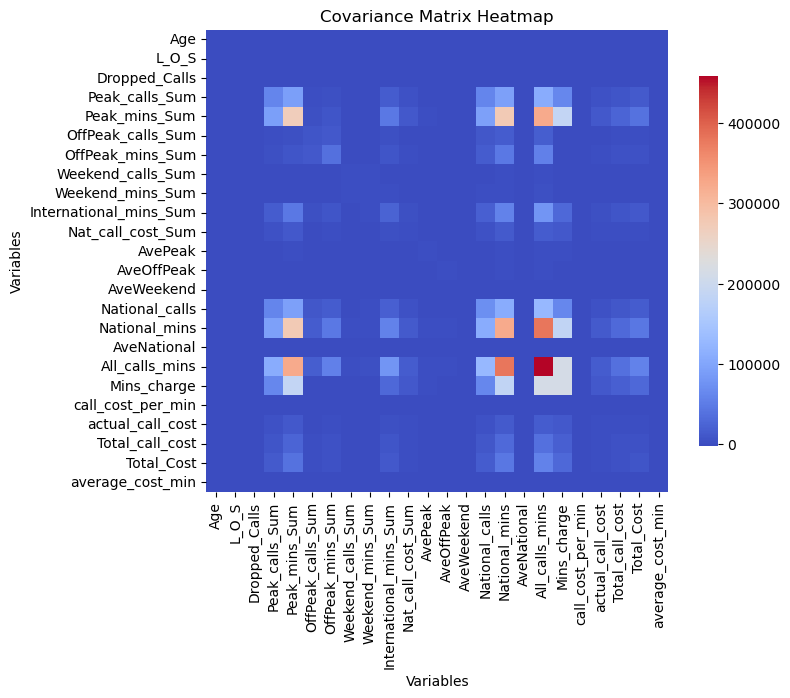

In [31]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with the covariance matrix
sns.heatmap(covariance_matrix, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

## Calculating the first quartile (Q1) values 

In [33]:
# Calculate the first quartile (Q1) for all numerical variables
q1_values = ch_1[numeric_columns_1].quantile(0.25)

# Display the Q1 values
print("First Quartile (Q1) Values:")
print(q1_values)

First Quartile (Q1) Values:
Age                        20.000000
L_O_S                      20.533333
Dropped_Calls               0.000000
Peak_calls_Sum             57.000000
Peak_mins_Sum             327.600000
OffPeak_calls_Sum          25.000000
OffPeak_mins_Sum          132.600001
Weekend_calls_Sum           4.000000
Weekend_mins_Sum           20.000000
International_mins_Sum     73.292063
Nat_call_cost_Sum           0.000000
AvePeak                     1.981856
AveOffPeak                  1.954011
AveWeekend                  1.869231
National_calls            157.000000
National_mins             642.899999
AveNational                 2.206364
All_calls_mins            756.312944
Mins_charge              -117.899999
call_cost_per_min           8.661073
actual_call_cost            0.000000
Total_call_cost            36.574513
Total_Cost                131.457270
average_cost_min            0.143618
Name: 0.25, dtype: float64


## Calculating the third quartile (Q3) values

In [34]:
# Calculate the third quartile (Q3) for all numerical variables
q3_values = ch_1[numeric_columns_1].quantile(0.75)

# Display the Q3 values
print("Third Quartile (Q3) Values:")
print(q3_values)

Third Quartile (Q3) Values:
Age                         38.000000
L_O_S                       45.666667
Dropped_Calls                2.000000
Peak_calls_Sum             355.000000
Peak_mins_Sum             1036.199999
OffPeak_calls_Sum          141.000000
OffPeak_mins_Sum           416.100000
Weekend_calls_Sum           22.000000
Weekend_mins_Sum            68.500000
International_mins_Sum     268.719481
Nat_call_cost_Sum           32.929760
AvePeak                      5.755556
AveOffPeak                   5.864706
AveWeekend                   5.250000
National_calls             486.000000
National_mins             1410.000001
AveNational                  4.518605
All_calls_mins            1664.632321
Mins_charge                313.199998
call_cost_per_min           11.915609
actual_call_cost            32.702889
Total_call_cost            107.922644
Total_Cost                 244.840251
average_cost_min             0.184679
Name: 0.75, dtype: float64


## Calculating the range

In [35]:
# Calculate the range for all numerical variables
range_values = ch_1[numeric_columns_1].max() - ch_1[numeric_columns_1].min()

# Display the range values
print("Range Values:")
print(range_values)

Range Values:
Age                         70.000000
L_O_S                       48.666667
Dropped_Calls               15.000000
Peak_calls_Sum            1725.000000
Peak_mins_Sum             2893.800001
OffPeak_calls_Sum          647.000000
OffPeak_mins_Sum          1146.000000
Weekend_calls_Sum          124.000000
Weekend_mins_Sum           205.000000
International_mins_Sum    1014.798636
Nat_call_cost_Sum          202.490394
AvePeak                   1631.400000
AveOffPeak                 645.600000
AveWeekend                 165.600000
National_calls            2013.000000
National_mins             3549.214852
AveNational                 58.241841
All_calls_mins            4179.849088
Mins_charge               4100.400000
call_cost_per_min           23.000000
actual_call_cost           202.490395
Total_call_cost            474.423392
Total_Cost                 564.462344
average_cost_min             5.488009
dtype: float64


## Calculating the inter-quartile range (Q3-Q10)

In [36]:
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = ch_1[numeric_columns_1].quantile(0.25)
q3 = ch_1[numeric_columns_1].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Display the IQR values
print("Interquartile Range (IQR) Values:")
print(iqr)

Interquartile Range (IQR) Values:
Age                        18.000000
L_O_S                      25.133334
Dropped_Calls               2.000000
Peak_calls_Sum            298.000000
Peak_mins_Sum             708.599999
OffPeak_calls_Sum         116.000000
OffPeak_mins_Sum          283.499999
Weekend_calls_Sum          18.000000
Weekend_mins_Sum           48.500000
International_mins_Sum    195.427418
Nat_call_cost_Sum          32.929760
AvePeak                     3.773700
AveOffPeak                  3.910695
AveWeekend                  3.380769
National_calls            329.000000
National_mins             767.100002
AveNational                 2.312241
All_calls_mins            908.319377
Mins_charge               431.099997
call_cost_per_min           3.254536
actual_call_cost           32.702889
Total_call_cost            71.348131
Total_Cost                113.382981
average_cost_min            0.041061
dtype: float64


## Calculating the 1, 5, 10, 90, 95, 99 percentile values

In [37]:
# Define the desired percentiles
percentiles = [0.01, 0.05, 0.10, 0.90, 0.95, 0.99]

# Calculate the specified percentiles for all numerical variables
percentile_values = ch_1[numeric_columns_1].quantile(percentiles)

# Display the percentile values
print("Percentile Values:")
print(percentile_values)

Percentile Values:
       Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0.01  12.0  10.000000            0.0             1.0           27.0   
0.05  14.0  12.000000            0.0            10.0           66.0   
0.10  16.0  13.900000            0.0            20.0          106.2   
0.90  49.0  53.166667            8.0           579.0         1439.4   
0.95  55.0  55.700000           10.0           742.0         1705.2   
0.99  66.0  57.706667           11.0          1078.0         2353.2   

      OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
0.01                0.0          0.000000                0.0   
0.05                4.0         33.599999                0.0   
0.10                9.0         55.799999                1.0   
0.90              231.0        570.599999               38.0   
0.95              288.0        646.200000               50.0   
0.99              404.2        805.920000               73.0   

      Weekend_mins_Sum  Internatio

## Outlier detection

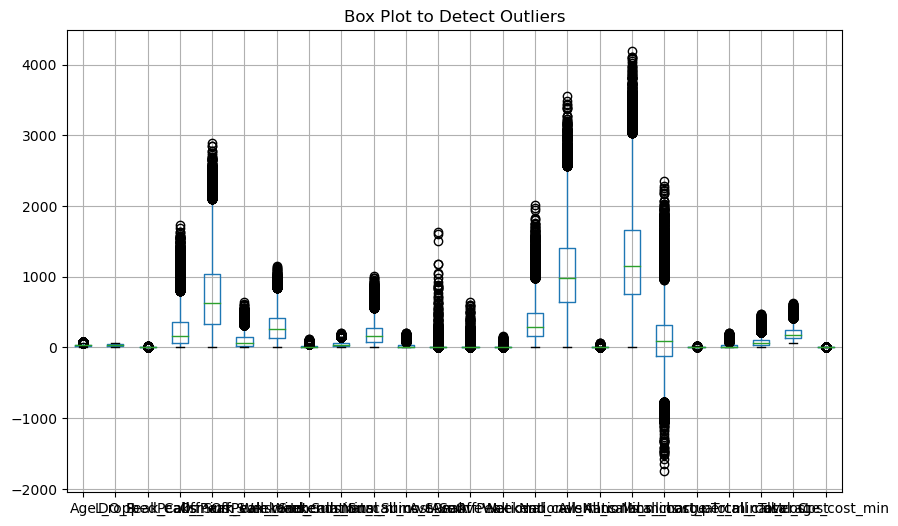

In [38]:
## outlier detection
plt.figure(figsize=(10, 6))
ch_1.boxplot()
plt.title("Box Plot to Detect Outliers")
plt.show()

## Calculating the z-score

In [41]:
from scipy import stats
# Calculate Z-scores
z_scores = stats.zscore(ch_1[numeric_columns_1])

# Determine outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Display outliers
print("Outliers detected using Z-score method:")
print(outliers)

Outliers detected using Z-score method:
         Age  L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0      False  False          False           False          False   
1      False  False          False           False          False   
2      False  False          False           False          False   
3      False  False          False           False          False   
4      False  False          False           False          False   
...      ...    ...            ...             ...            ...   
24994  False  False          False           False          False   
24995  False  False          False           False          False   
24996  False  False          False           False          False   
24997  False  False          False           False          False   
24998  False  False          False           False          False   

       OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
0                  False             False              False   
1

In [45]:
# Determine outliers
outliers = ((ch_1[numeric_columns_1]< (q1 - 1.5 * iqr)) | (ch_1[numeric_columns_1]> (3 + 1.5 * iqr)))

# Display outliers
print("Outliers detected using IQR method:")
print(outliers)

Outliers detected using IQR method:
         Age  L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0       True  False          False           False          False   
1      False  False          False           False          False   
2       True   True          False           False          False   
3      False  False          False           False          False   
4       True  False          False           False          False   
...      ...    ...            ...             ...            ...   
24994   True   True          False            True           True   
24995  False  False          False           False          False   
24996  False  False           True           False          False   
24997   True  False          False            True           True   
24998  False  False          False            True          False   

       OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
0                  False             False              False   
1    

## Finding the outliers below 1 percentile and above 99 percentile

In [46]:
# Define the lower and upper percentiles
lower_percentile = 0.01  # 1st percentile
upper_percentile = 0.99   # 99th percentile

# Calculate the lower and upper bounds
lower_bound = ch_1[numeric_columns_1].quantile(lower_percentile)
upper_bound = ch_1[numeric_columns_1].quantile(upper_percentile)

# Identify outliers
outliers = (ch_1[numeric_columns_1] < lower_bound) | (ch_1[numeric_columns_1] > upper_bound)

# Display outliers
print("Outliers detected using percentile method:")
print(outliers)

Outliers detected using percentile method:
         Age  L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0      False  False          False           False          False   
1      False  False          False           False          False   
2      False  False          False           False          False   
3      False  False          False           False          False   
4      False  False          False           False          False   
...      ...    ...            ...             ...            ...   
24994  False  False          False           False          False   
24995  False  False          False           False          False   
24996  False  False          False           False          False   
24997  False  False          False           False          False   
24998  False  False          False           False          False   

       OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
0                  False             False              False  

## Capping the outliers below 1 percentile and above 99 percentile

In [58]:
# Calculate the 1st and 99th percentiles
lower_bound = numeric_columns.quantile(0.01)
upper_bound = numeric_columns.quantile(0.99)
numeric_columns_capped = numeric_columns.copy()  # Create a copy to avoid modifying the original DataFrame
numeric_columns_capped = numeric_columns_capped.clip(lower=lower_bound, upper=upper_bound, axis=1)


# Display the original and capped DataFrames
print("Original DataFrame:")
print(numeric_columns)

print("\nCapped DataFrame:")
print(numeric_columns_capped)

Original DataFrame:
       Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0       46  15.066667              1              14      36.131353   
1       27  37.333333              0              54      39.437279   
2       39  50.366667              2              44      72.600000   
3       28  26.200000              2              44      72.600000   
4       38  12.133333              1              68      56.370313   
...    ...        ...            ...             ...            ...   
24994   49  42.766667              0             575    1291.799999   
24995   22  27.400000              0             415     674.399999   
24996   13  28.733333              7             375     843.000000   
24997   58  15.900000              0             763    1156.200001   
24998   17  11.133333              2             534     958.800001   

       OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
0                     10          7.973121                 24 

## Capping values below 5 percentile and 95 percentile

In [59]:
# Calculate the 5th and 95th percentiles
lower_bound = numeric_columns.quantile(0.05)
upper_bound = numeric_columns.quantile(0.95)
numeric_columns_capped_1 = numeric_columns.copy()  # Create a copy to avoid modifying the original DataFrame
numeric_columns_capped_1 = numeric_columns_capped.clip(lower=lower_bound, upper=upper_bound, axis=1)


# Display the original and capped DataFrames
print("Original DataFrame:")
print(numeric_columns)

print("\nCapped DataFrame:")
print(numeric_columns_capped)

Original DataFrame:
       Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0       46  15.066667              1              14      36.131353   
1       27  37.333333              0              54      39.437279   
2       39  50.366667              2              44      72.600000   
3       28  26.200000              2              44      72.600000   
4       38  12.133333              1              68      56.370313   
...    ...        ...            ...             ...            ...   
24994   49  42.766667              0             575    1291.799999   
24995   22  27.400000              0             415     674.399999   
24996   13  28.733333              7             375     843.000000   
24997   58  15.900000              0             763    1156.200001   
24998   17  11.133333              2             534     958.800001   

       OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
0                     10          7.973121                 24 